# Aplicar técnicas de Mineração de Dados, utilizando o algoritmo de Clusterização para agrupar as informações e notas dos candidatos

## Área de agrupamentos: Matemática; Fundamentos da Computação; Tecnologias da Computação


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
# import plotly.graph_objects as go
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import import_ipynb
import services.lista_estados_regioes as ler

importing Jupyter notebook from C:\Users\jeanc\Documentos\GitHub\project_dataScience_POSCOMP\services\lista_estados_regioes.ipynb


## Descrição dos dados

In [2]:
dados = pd.read_csv('dados/df_poscomp.csv')
dados = dados.drop(columns='INSCRICAO')

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10977 entries, 0 to 10976
Data columns (total 35 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   SEXO                                             10977 non-null  int64  
 1   ESTADO                                           10977 non-null  int64  
 2   REGIAO                                           10977 non-null  int64  
 3   ESPECIALIDADE                                    10977 non-null  object 
 4   PRESENTE                                         10977 non-null  object 
 5   CARGO                                            10977 non-null  int64  
 6   Matemática Discreta                              10977 non-null  float64
 7   Cálculo Diferencial e Integral                   10977 non-null  float64
 8   Álgebra Linear                                   10977 non-null  float64
 9   Geometria Analítica         

In [4]:
dados['PRESENTE'].unique()

array(['S'], dtype=object)

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|1|Masculino|
|0|Feminino|

> ### UF
> ***

|Código|Descrição|
|---|---|
|0|AC|
|1|AL|
|2|AP|
|3|AM|
|4|BA|
|5|CE|
|6|DF|
|7|ES|
|8|GO|
|9|MA|
|10|MT|
|11|MS|
|12|MG|
|13|PA|
|14|PB|
|15|PR|
|16|PE|
|17|PI|
|18|RJ|
|19|RN|
|20|RS|
|21|RO|
|22|RR|
|23|SC|
|24|SP|
|25|SE|
|26|TO|

> ### Cargo
> ***

|Código|Descrição|
|---|---|
|0|Mestrado/Doutorado|
|1|Autoavaliação|

> ### Região
> ***

|Código|Descrição|
|---|---|
|0|norte|
|1|nordeste|
|2|centro_oeste|
|3|sudeste|
|4|sul|

> ### Situação
> ***

|Código|Descrição|
|---|---|
|0|Ausente|
|1|Presente|

## Analise Explorária dos Dados

Quantas pessoas são do sexo masculino e feminino

In [5]:
frequencia_sexo = dados['SEXO'].value_counts() 

percentual_sexo = dados['SEXO'].value_counts(normalize = True) * 100 

dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia_sexo, 'Porcentagem (%)': percentual_sexo.round(2)})
dist_freq_qualitativas.rename (index = {1: 'Masculino', 0: 'Feminino', 3: 'Total'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,9063,82.56
Feminino,1914,17.44


In [6]:
sexo = {1: 'Masculino',
        0: 'Feminino'}
cargo = {0: 'Mestrado/Doutorado',
        1: 'Autoavaliação'} 

frequencia_sexo_cargo = pd.crosstab(dados.SEXO, dados.ANO)
frequencia_sexo_cargo.rename(index = sexo, inplace = True)
# frequencia_sexo_cargo.rename(columns = cargo, inplace = True)
frequencia_sexo_cargo

ANO,2016,2017,2018,2019
SEXO,,,,
Feminino,530,576,427,381
Masculino,2606,2572,2120,1765


Qual a média, mediana e máximo?

In [7]:
# renda_2 = pd.crosstab(dados.matematica,
#                          dados.SEXO,
#                          aggfunc = {'mean', 'median', 'max'},
#                          values = dados.ESTADO).round(2)
# # renda_2.rename(index = cor, inplace = True)
# renda_2.rename(columns = sexo, inplace = True)
# renda_2

<AxesSubplot: title={'center': 'Candidatos por Sexo'}, xlabel='R$', ylabel='Sexo'>

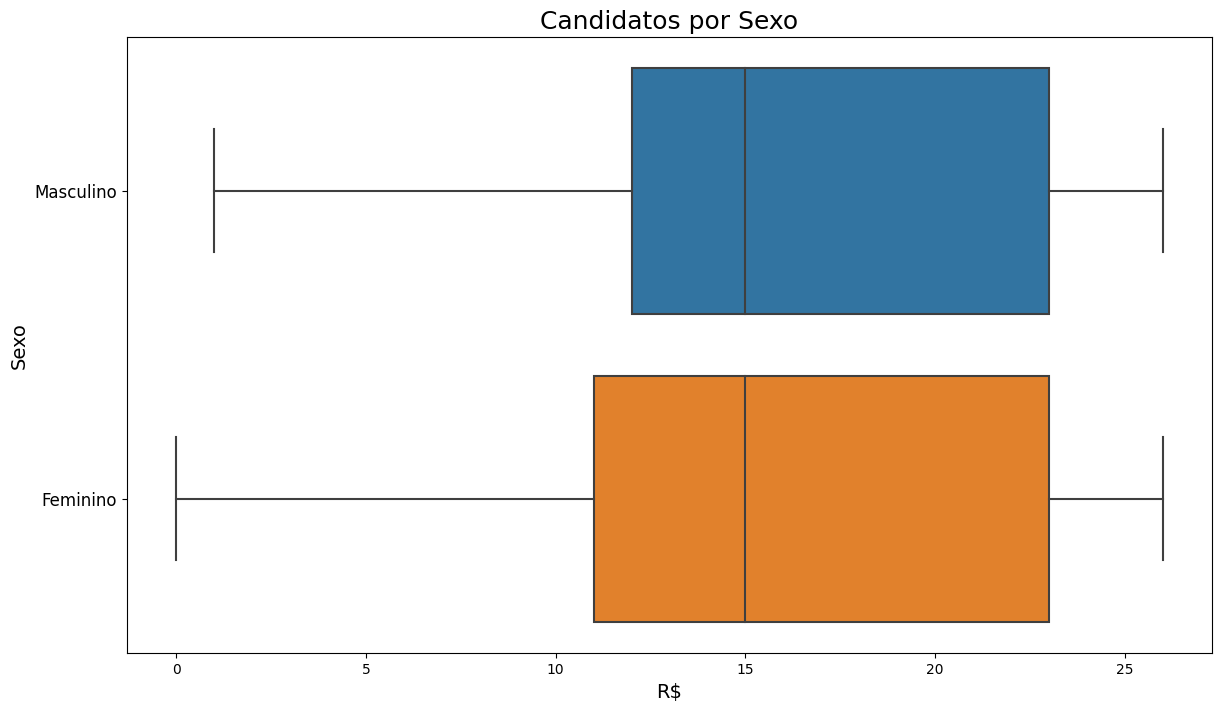

In [8]:
boxplot_sexo = sns.boxplot(x = 'ESTADO', y = 'SEXO', data = dados, orient = 'h')

boxplot_sexo.figure.set_size_inches(14, 8)
boxplot_sexo.set_title('Candidatos por Sexo', fontsize=18)
boxplot_sexo.set_xlabel('R$', fontsize=14)
boxplot_sexo.set_ylabel('Sexo', fontsize=14)
boxplot_sexo.set_yticklabels(['Masculino', 'Feminino'], fontsize=12)

boxplot_sexo

In [9]:
estados = {
    0: 'Acre',
    1: 'Alagoas',
    2: 'Amapá',
    3: 'Amazonas',
    4: 'Bahia',
    5: 'Ceará',
    6: 'Distrito Federal',
    7: 'Espírito Santo',
    8: 'Goiás',
    9: 'Maranhão',
    10: 'Mato Grosso',
    11: 'Mato Grosso do Sul',
    12: 'Minas Gerais',
    13: 'Pará',
    14: 'Paraíba',
    15: 'Paraná',
    16: 'Pernambuco',
    17: 'Piauí',
    18: 'Rio de Janeiro',
    19: 'Rio Grande do Norte',
    20: 'Rio Grande do Sul',
    21: 'Rondônia',
    22: 'Roraima',
    23: 'Santa Catarina',
    24: 'São Paulo',
    25: 'Sergipe',
    26: 'Tocantins'
}

estados_brasileiros = {0: 'AC',
           1: 'AL',
           2: 'AM',
           3: 'AP',
           4: 'BA',
           5: 'CE',
           6: 'DF',
           7: 'ES',
           8: 'GO',
           9: 'MA',
           10: 'MG',
           11: 'MS',
           12: 'MT',
           13: 'PA',
           14: 'PB',
           15: 'PE',
           16: 'PI',
           17: 'PR',
           18: 'RJ',
           19: 'RN',
           20: 'RO',
           21: 'RR',
           22: 'RS',
           23: 'SC',
           24: 'SE',
           25: 'SP',
           26: 'TO'}

In [10]:
regioes = {
    0: 'Norte',
    1: 'Nordeste',
    2: 'Centro-Oeste',
    3: 'Sudeste',
    4: 'Sul'
}

In [11]:
renda_estatisticas_por_uf = dados.groupby(['ESTADO']).agg({'matematica': ['mean', 'median', 'max', 'std'],
                                                            'fundamentos_computacao': ['mean', 'median', 'max', 'std'],
                                                            'tecnologia_computacao': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index= estados)

matematica                        fundamentos_computacao  \
                          mean median   max       std                   mean   
ESTADO                                                                         
Acre                  8.500000    8.0  15.0  4.932883              14.000000   
Alagoas               8.118012    8.0  15.0  2.795932              13.751553   
Amapá                 5.333333    4.5  12.0  3.113996              10.000000   
Amazonas              6.840000    7.0  15.0  2.444188              12.920000   
Bahia                 7.304688    7.0  15.0  2.860424              14.093750   
Ceará                 8.441624    8.0  18.0  3.232708              14.274112   
Distrito Federal      9.514286    9.0  20.0  3.809762              15.600000   
Espírito Santo        8.392000    8.0  19.0  3.359628              13.986667   
Goiás                 7.271493    7.0  17.0  2.918943              13.461538   
Maranhão              7.318471    7.0  17.0  2.878894              12.914013   
Mato Grosso           7.302158    7.0  17.0  2.685589              13.330935   
Mato Grosso do Sul    7.680804    7.0  18.0  3.096276              13.642857   
Minas Gerais          8.433700    8.0  20.0  3.214617              14.565568   
Pará                  6.749536    6.0  17.0  2.620050              12.141002   
Paraíba               7.633224    7.0  19.0  2.893271              13.980263   
Paraná                7.858277    8.0  20.0  3.024171              14.255102   
Pernambuco            8.300000    8.0  16.0  3.321237              13.620000   
Piauí                 6.899135    7.0  16.0  2.739916              12.858790   
Rio de Janeiro        9.730539   10.0  19.0  3.464859              15.086826   
Rio Grande do Norte   8.158537    8.0  20.0  3.495727              14.085366   
Rio Grande do Sul     7.973913    8.0  20.0  3.238175              14.167150   
Rondônia              6.764706    7.0  11.0  2.562455              11.529412   
Roraima               5.200000    5.0   7.0  1.483240              10.800000   
Santa Catarina        7.926621    8.0  20.0  3.060039              14.194539   
São Paulo             8.454503    8.0  20.0  3.345896              14.118668   
Sergipe               8.224299    8.0  20.0  3.351453              14.448598   
Tocantins             7.425532    7.0  14.0  2.464925              13.808511   

                                           tecnologia_computacao               \
                    median   max       std                  mean median   max   
ESTADO                                                                          
Acre                  14.0  17.0  2.581989              7.500000    7.0  10.0   
Alagoas               14.0  23.0  3.267321              8.037267    8.0  15.0   
Amapá                  9.5  14.0  2.522625              7.833333    7.5  11.0   
Amazonas              13.0  20.0  3.039203              7.306667    7.0  12.0   
Bahia                 14.0  24.0  3.625017              7.773438    8.0  15.0   
Ceará                 14.0  25.0  3.683586              8.135364    8.0  16.0   
Distrito Federal      15.0  23.0  4.226898              8.771429    8.5  15.0   
Espírito Santo        14.0  28.0  3.794498              7.834667    8.0  16.0   
Goiás                 13.0  24.0  3.472551              7.561086    7.0  15.0   
Maranhão              13.0  21.0  3.626614              7.773885    8.0  14.0   
Mato Grosso           13.0  24.0  3.761723              7.517986    7.0  14.0   
Mato Grosso do Sul    14.0  24.0  3.612945              7.243304    7.0  16.0   
Minas Gerais          14.0  26.0  3.744143              7.939927    8.0  16.0   
Pará                  12.0  25.0  3.453699              7.265306    7.0  15.0   
Paraíba               14.0  26.0  3.608009              7.807566    8.0  16.0   
Paraná                14.0  25.0  3.776924              8.061224    8.0  15.0   
Pernambuco            13.0  25.0  3.853914              7.120000    7.0  15.0   

#### Geração de gráficos da áreas de matemática, fundamentos da computação e tecnologia da computação

In [12]:
media_estatisticas_por_uf = dados.groupby(['ESTADO']).agg({'matematica': ['mean'],
                                                            'fundamentos_computacao': ['mean'],
                                                            'tecnologia_computacao': ['mean']})
media_estatisticas_por_uf = media_estatisticas_por_uf.rename(index=estados_brasileiros)

In [13]:
por_uf = dados.groupby(['ESTADO', 'REGIAO']).agg({'matematica': 'mean',
                                                            'fundamentos_computacao': 'mean',
                                                            'tecnologia_computacao': 'mean'})
# por_uf = por_uf.rename(columns={'ESTADO':estados_brasileiros, 'REGIAO':regioes}, index=)
por_uf = por_uf.reset_index()
por_uf['ESTADO'] = por_uf['ESTADO'].replace(estados_brasileiros)
por_uf['REGIAO'] = por_uf['REGIAO'].replace(regioes)
por_uf

,ESTADO,REGIAO,matematica,fundamentos_computacao,tecnologia_computacao
0,AC,Norte,8.500000,14.000000,7.500000
1,AL,Nordeste,8.118012,13.751553,8.037267
2,AM,Norte,5.333333,10.000000,7.833333
3,AP,Norte,6.840000,12.920000,7.306667
4,BA,Nordeste,7.304688,14.093750,7.773438
5,CE,Nordeste,8.441624,14.274112,8.135364
6,DF,Centro-Oeste,9.514286,15.600000,8.771429
7,ES,Sudeste,8.392000,13.986667,7.834667
8,GO,Centro-Oeste,7.271493,13.461538,7.561086
9,MA,Nordeste,7.318471,12.914013,7.773885


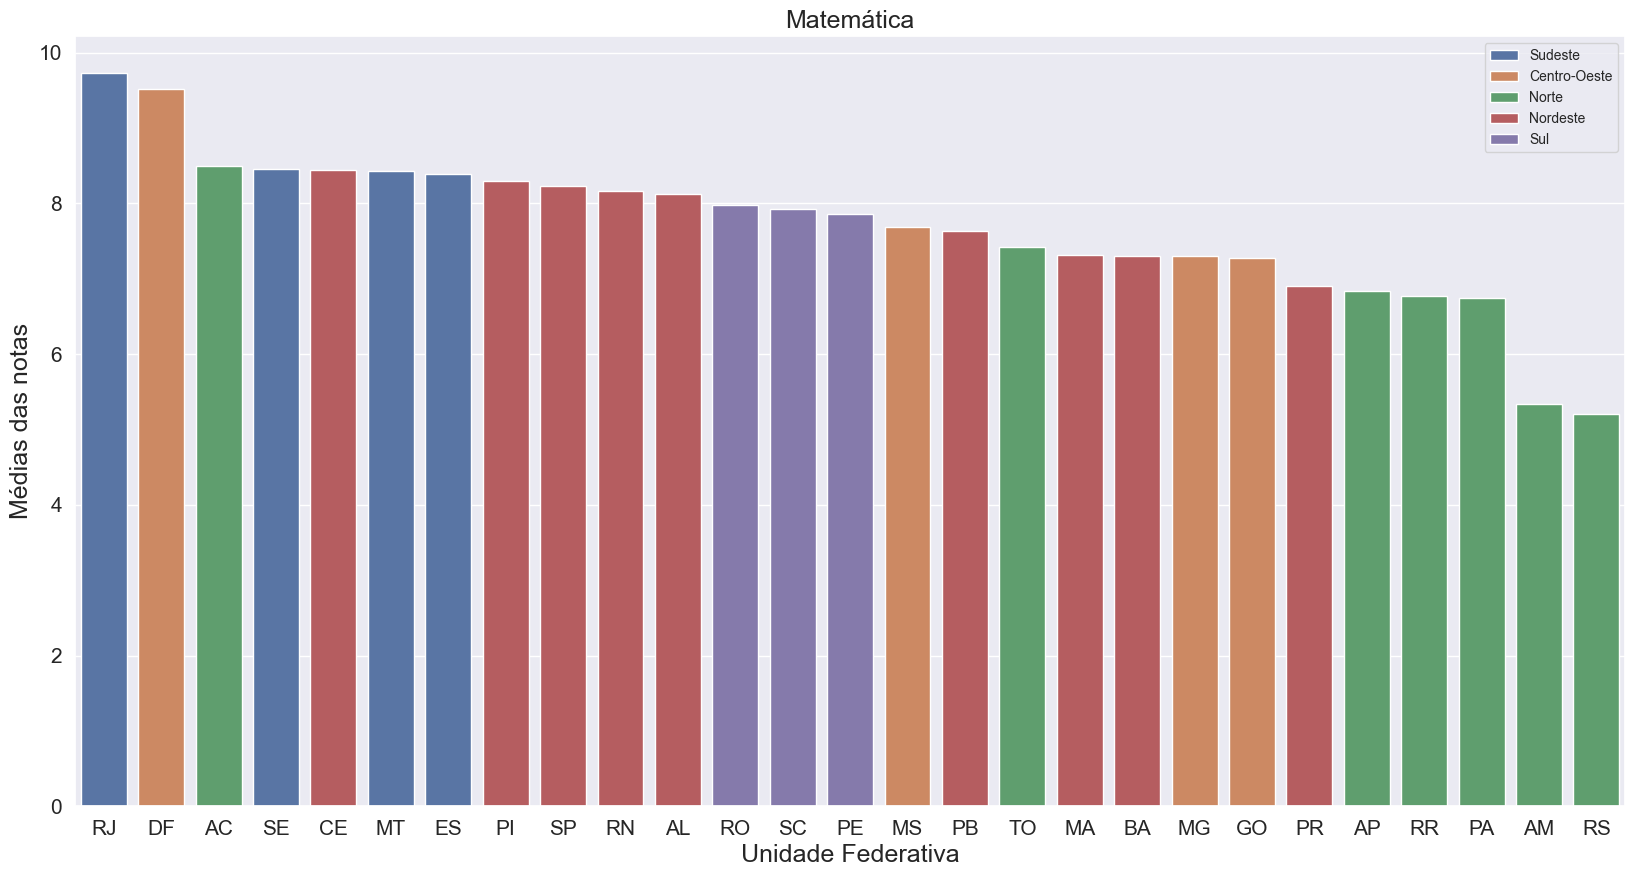

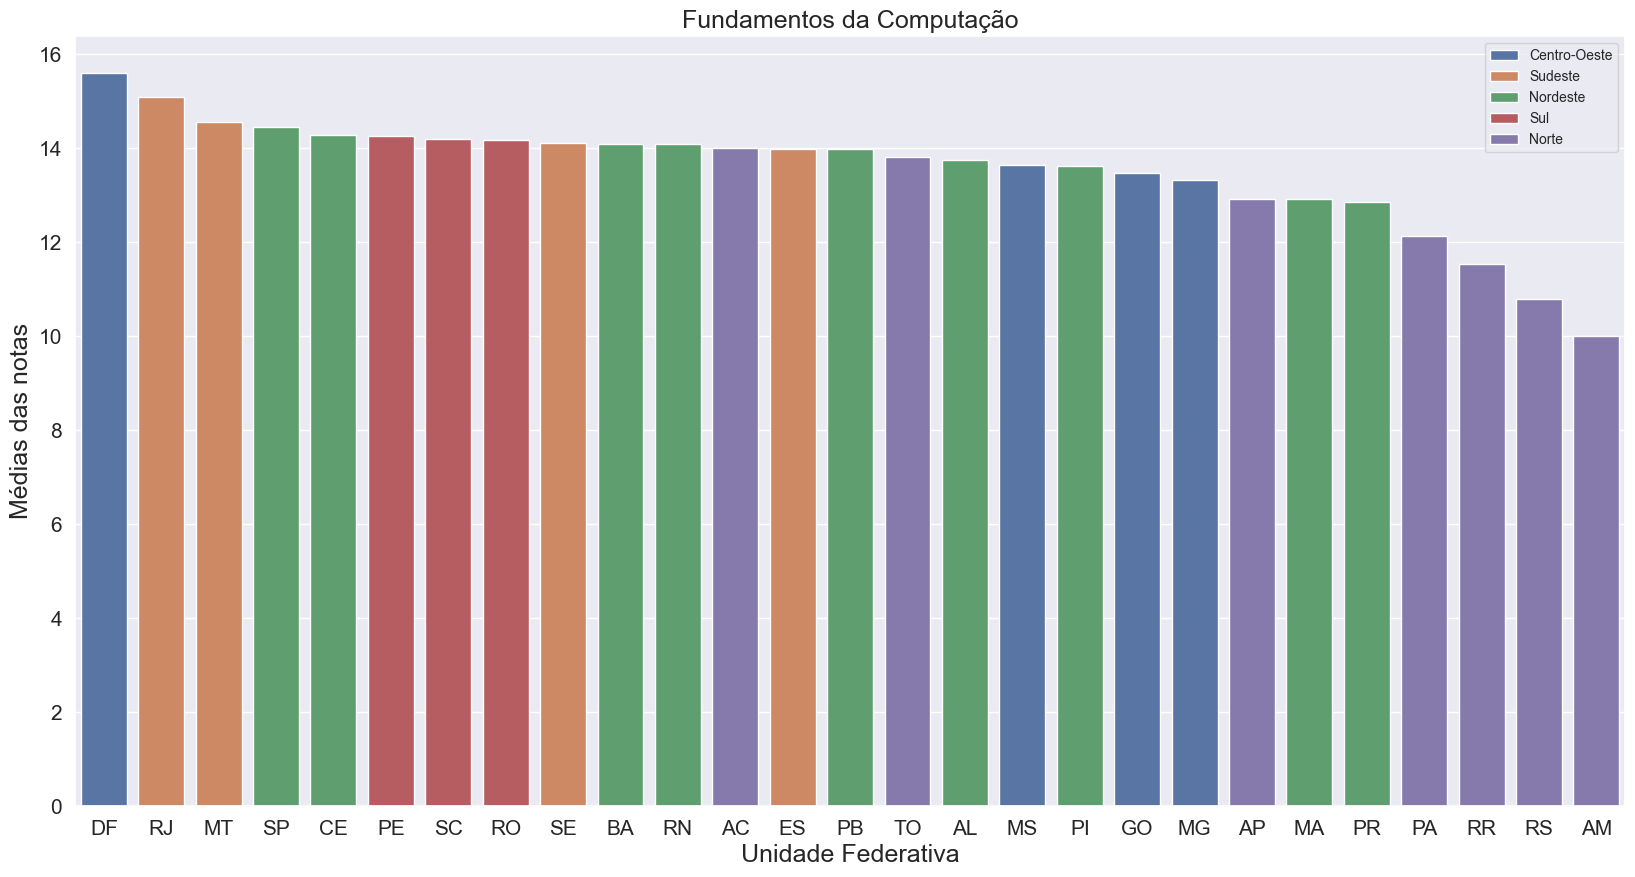

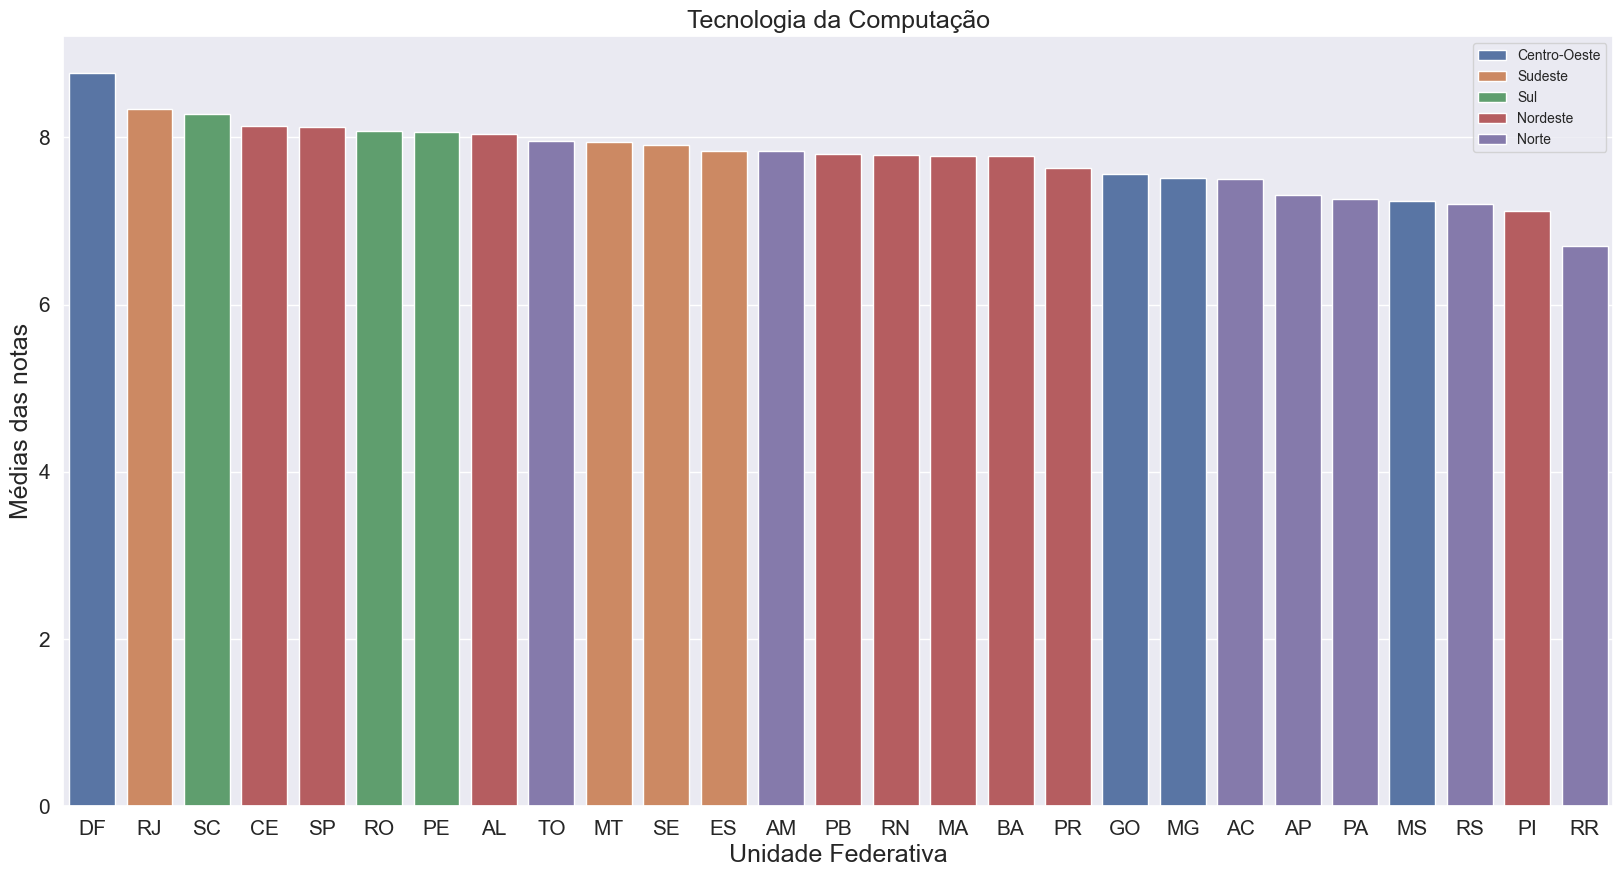

In [14]:
# colores_regioes = ['g' if ler.regioes_brasil]
lista_eixo = {'matematica': 'Matemática',
           'fundamentos_computacao': 'Fundamentos da Computação',
           'tecnologia_computacao': 'Tecnologia da Computação'}
for i in lista_eixo:
    plt.figure(figsize=(20,10))
    df_media_uf = por_uf.sort_values([i], ascending=False)
    sns.set_theme()
    sns.barplot(data=df_media_uf,
                y=i,
                x='ESTADO',
                hue='REGIAO',
                dodge=False,
               );
    
    # Adicionar legenda nos eixos
    
    plt.legend(fontsize=10)
    plt.title(lista_eixo[i], fontsize=18)
    plt.xlabel('Unidade Federativa', fontsize=18)
    plt.ylabel('Médias das notas', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [15]:
# # Plotar um mapa com as médias de cada estados
# import json
# import folium

# media_estado = media_estatisticas_por_uf['matematica']
# media_estado = media_estado.reset_index()

# from branca.colormap import linear

# estados_geoJSON = json.load(open('Brasil.json'))

# mapa = folium.Map(location=[-15,-48], width=600, height=500, zoom_start=4)
# # folium.GeoJson(estados_geoJSON).add_to(mapa)

# mapa_cores = linear.Greys_07.scale(media_estado['mean'].min(), media_estado['mean'].max(), max_labels=5)

# mapa_cores.caption = 'Notas'
# mapa_cores.add_to(mapa)

# folium.GeoJson(estados_geoJSON,
#                style_function=lambda x: {'fillColor': mapa_cores(dict_media_estado[x['id']]),
#                                                           'weight': '0.3',}).add_to(mapa)
# # mapa.save('mapa.html')
# mapa

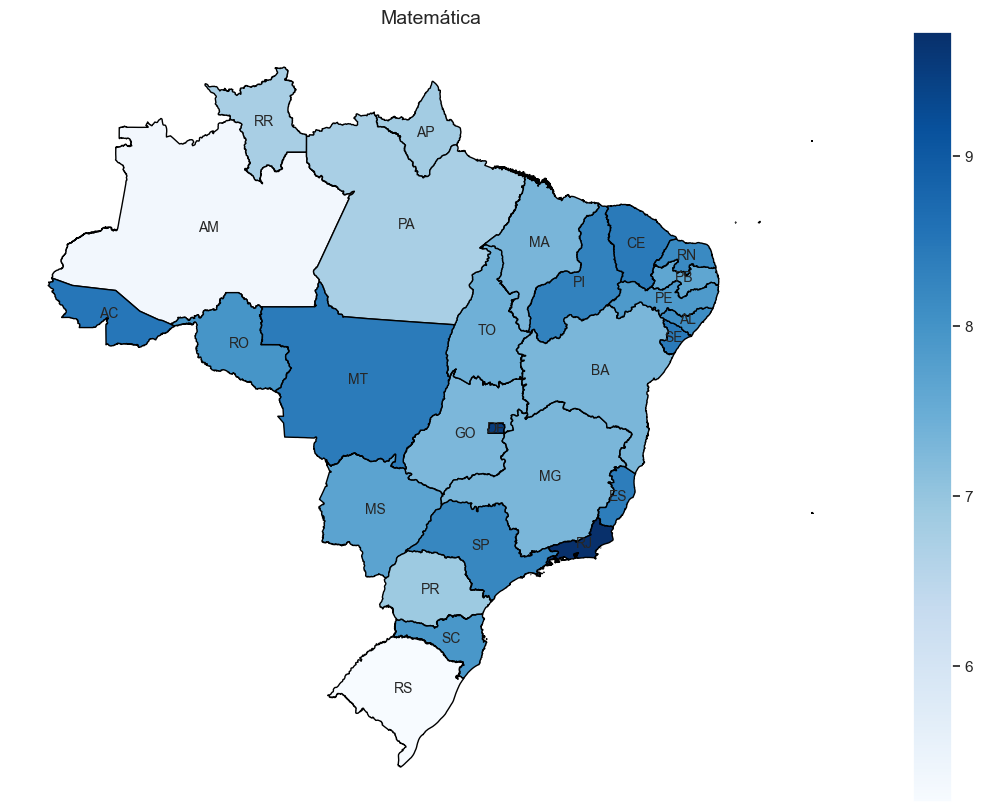

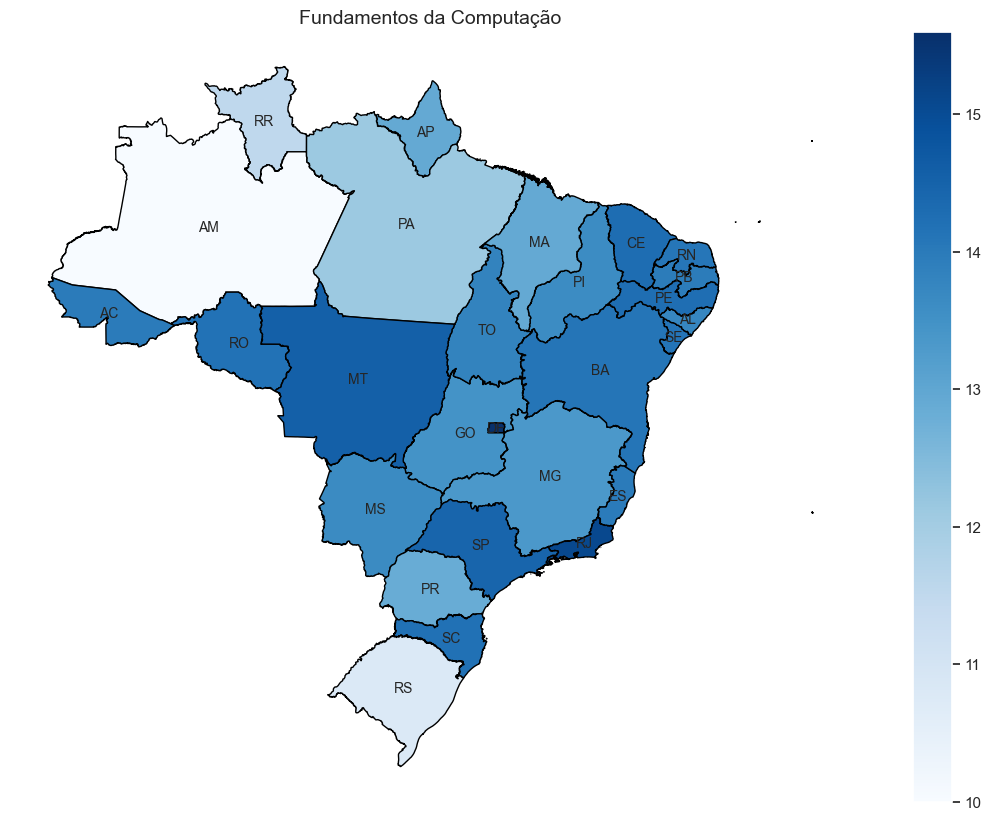

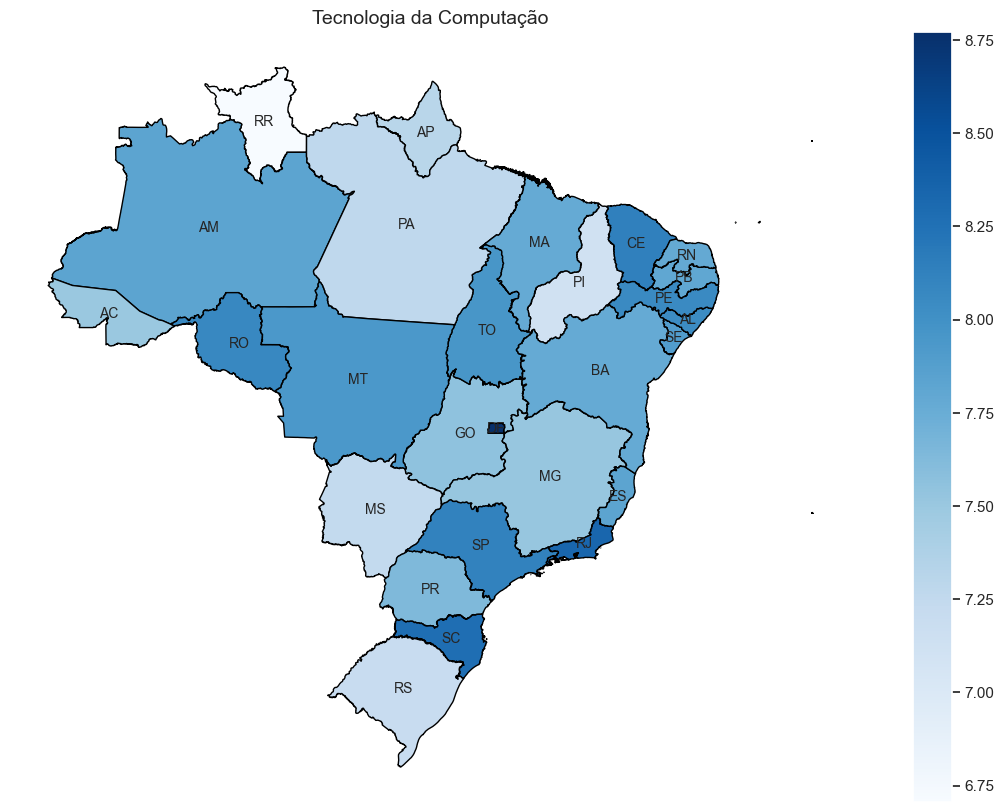

In [111]:
import geopandas as gpd
%matplotlib inline

INFOS_UFS = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')
INFOS_UFS.columns

# print("Estado: " + INFOS_UFS.nome[18])
# INFOS_UFS.geometry[18]

INFOS_UFS.rename({'sigla': 'ESTADO'}, axis=1, inplace=True)

BRASIL = INFOS_UFS.merge(por_uf, on='ESTADO', how='left')
# BRASIL[['ESTADO', 'mean']].head()
BRASIL = BRASIL.to_crs(epsg=3395)

lista_area = {'matematica': 'Matemática',
           'fundamentos_computacao': 'Fundamentos da Computação',
           'tecnologia_computacao': 'Tecnologia da Computação'}
for area in lista_area:
    ax = BRASIL.plot(column= area,
               cmap = 'Blues',
               figsize = (16,10),
               legend = True,
               edgecolor = 'black');
    plt.title(lista_area[area], fontsize=14)
    for i in BRASIL.index:
        plt.text(BRASIL.geometry.centroid[i].coords[0][0], BRASIL.geometry.centroid[i].coords[0][1], BRASIL.ESTADO[i],
                 fontsize=10, horizontalalignment='center', verticalalignment='center', )

    ax.set_axis_off();

In [17]:
renda_estatisticas_por_regiao = dados.groupby(['REGIAO']).agg({'matematica': ['mean', 'median', 'max', 'std'],
                                                              'fundamentos_computacao': ['mean', 'median', 'max', 'std'],
                                                              'tecnologia_computacao': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_regiao.rename(index= regioes)

matematica                        fundamentos_computacao         \
                   mean median   max       std                   mean median   
REGIAO                                                                         
Norte          6.779685    6.0  17.0  2.616367              12.286123   12.0   
Nordeste       7.772065    7.0  20.0  3.063039              13.768421   14.0   
Centro-Oeste   7.585077    7.0  20.0  3.071521              13.655141   14.0   
Sudeste        8.543509    8.0  20.0  3.331953              14.328816   14.0   
Sul            7.922093    8.0  20.0  3.121815              14.204555   14.0   

                             tecnologia_computacao                         
               max       std                  mean median   max       std  
REGIAO                                                                     
Norte         25.0  3.483645              7.313305    7.0  15.0  2.474045  
Nordeste      26.0  3.698299              7.868826    8.0  16.0  2.614374  
Centro-Oeste  24.0  3.650773              7.503185    7.0  16.0  2.553390  
Sudeste       28.0  3.803630              7.944127    8.0  16.0  2.620139  
Sul           28.0  3.890347              8.117459    8.0  18.0  2.599688

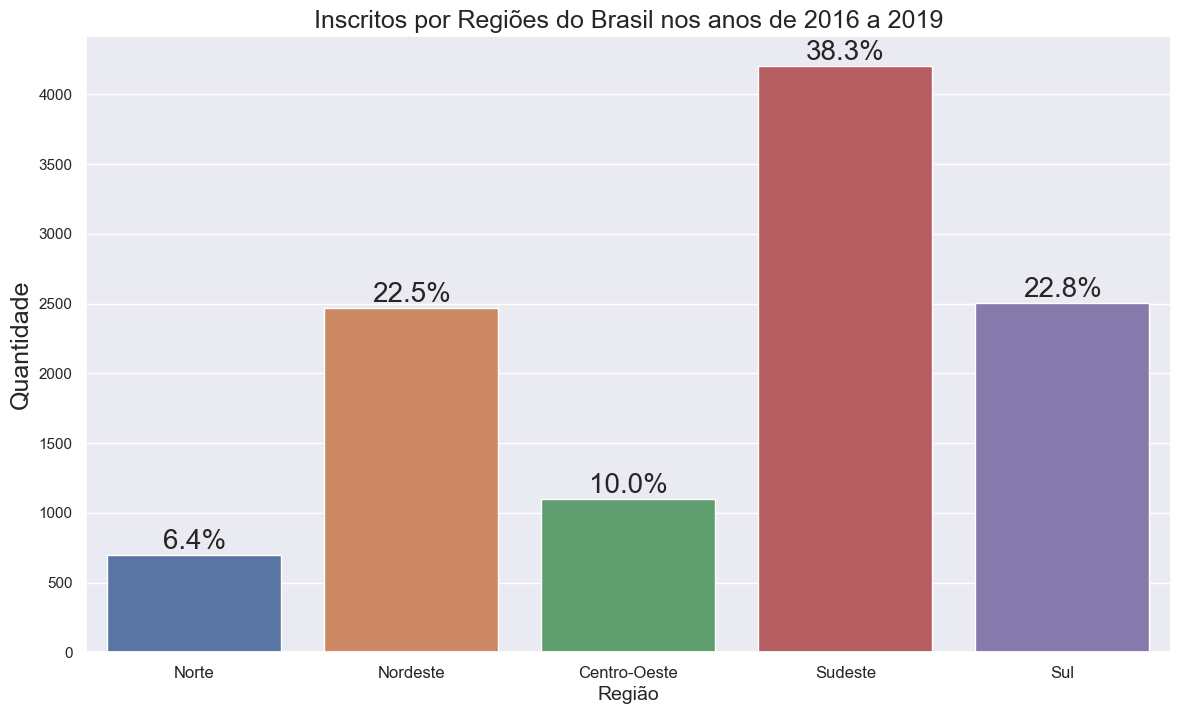

In [116]:
total = float(len(dados["REGIAO"]))

boxplot_regiao = sns.countplot(x = 'REGIAO', data = dados)

boxplot_regiao.figure.set_size_inches(14, 8)

for p in boxplot_regiao.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    boxplot_regiao.annotate(percentage, (x, y),size=20, ha="center", va="bottom")

boxplot_regiao.set_title('Inscritos por Regiões do Brasil nos anos de 2016 a 2019', fontsize=18)
boxplot_regiao.set_ylabel('Quantidade', fontsize=18)
boxplot_regiao.set_xlabel('Região', fontsize=14)
boxplot_regiao.set_xticklabels([key for key in regioes.values()], fontsize=12)

boxplot_regiao;

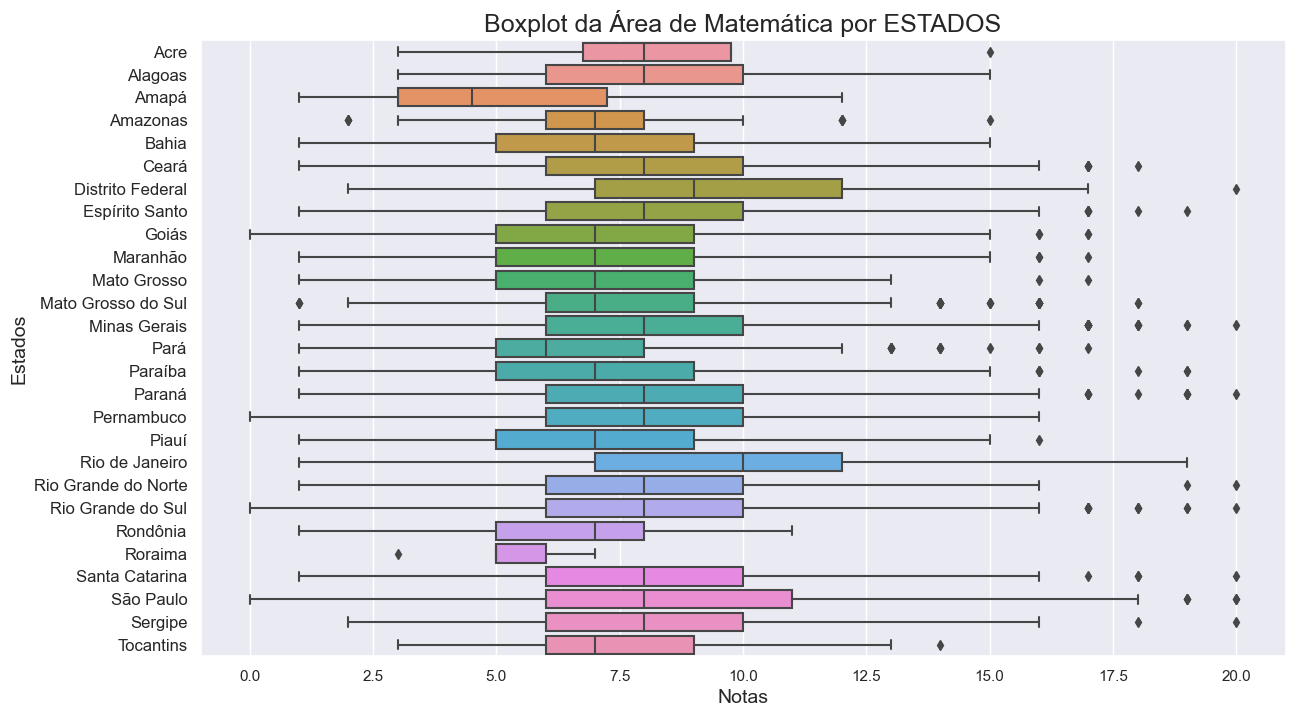

In [19]:
boxplot_uf = sns.boxplot(x = 'matematica', y = 'ESTADO', data=dados, orient='h')

boxplot_uf.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

boxplot_uf.set_title('Boxplot da Área de Matemática por ESTADOS', fontsize=18)    # Configurando o título do gráfico

boxplot_uf.set_xlabel('Notas', fontsize=14)    # Configurando o label do eixo X

boxplot_uf.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
boxplot_uf.set_yticklabels([key for key in estados.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

boxplot_uf
plt.savefig('imagens/graficoboxplot_matematica.png')

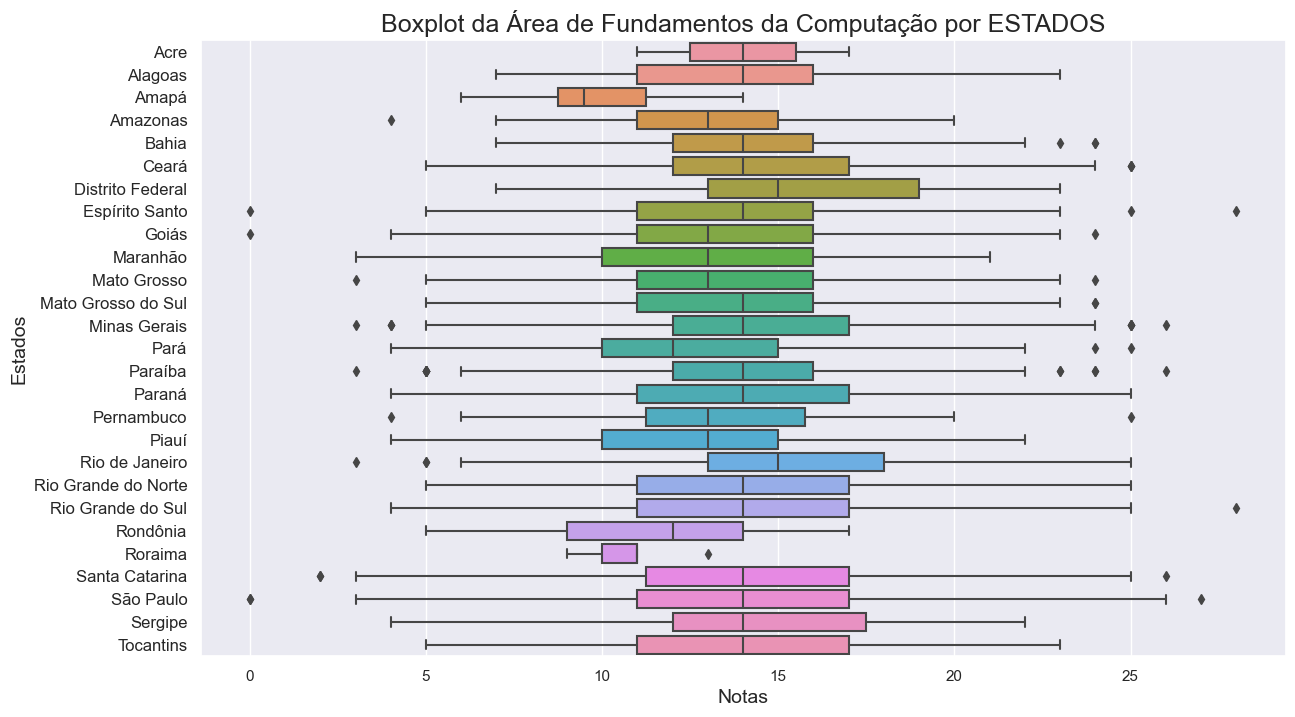

In [20]:
boxplot_uf = sns.boxplot(x = 'fundamentos_computacao', y = 'ESTADO', data=dados, orient='h')

boxplot_uf.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

boxplot_uf.set_title('Boxplot da Área de Fundamentos da Computação por ESTADOS', fontsize=18)    # Configurando o título do gráfico

boxplot_uf.set_xlabel('Notas', fontsize=14)    # Configurando o label do eixo X

boxplot_uf.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
boxplot_uf.set_yticklabels([key for key in estados.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

boxplot_uf
plt.savefig('imagens/graficoboxplot_fundComputação.png')

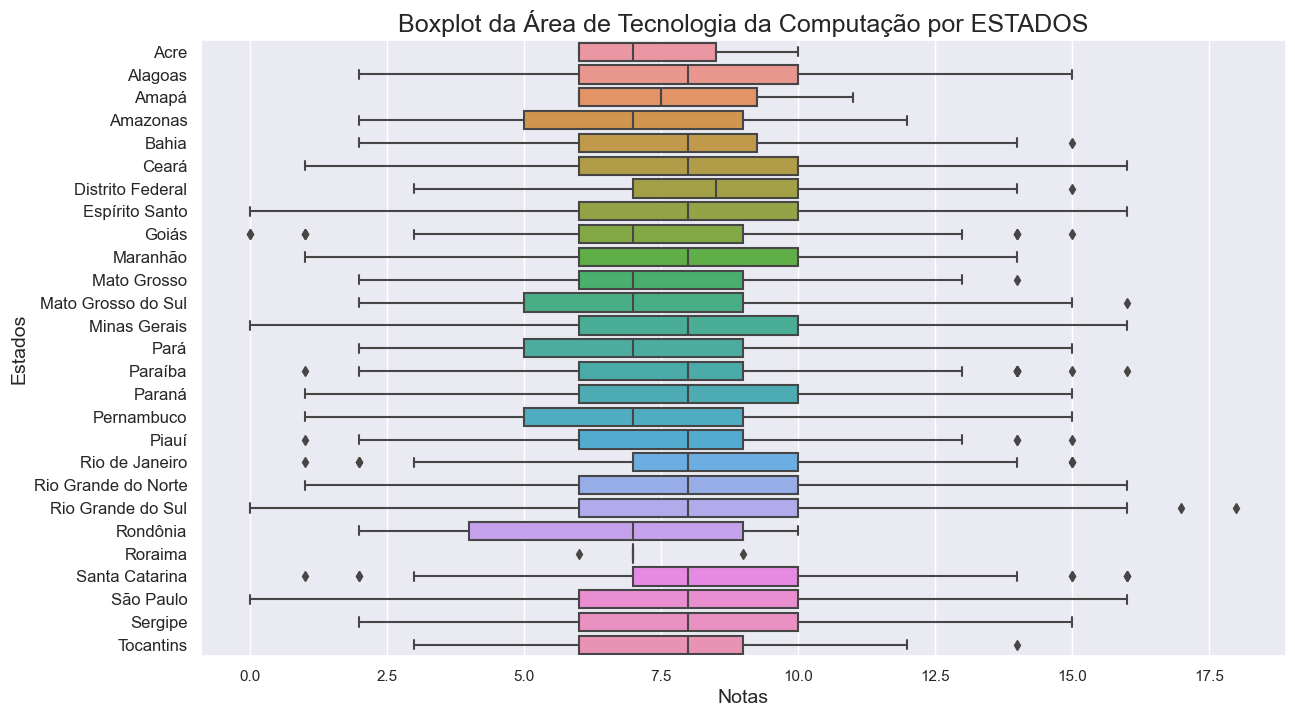

In [21]:
boxplot_uf = sns.boxplot(x = 'tecnologia_computacao', y = 'ESTADO', data=dados, orient='h')

boxplot_uf.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

boxplot_uf.set_title('Boxplot da Área de Tecnologia da Computação por ESTADOS', fontsize=18)    # Configurando o título do gráfico

boxplot_uf.set_xlabel('Notas', fontsize=14)    # Configurando o label do eixo X

boxplot_uf.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
boxplot_uf.set_yticklabels([key for key in estados.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

boxplot_uf
plt.savefig('imagens/graficoboxplot_computacao.png')

In [22]:
dados.head()

,SEXO,ESTADO,REGIAO,ESPECIALIDADE,PRESENTE,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,ANO,matematica,fundamentos_computacao,tecnologia_computacao
0,1,5,1,teoria da computação,S,0,3.0,3.0,2.0,0.0,...,1.0,3.0,2.0,1.0,1.0,1.0,2016,14.0,21.0,10.0
1,1,20,4,metodologia e técnicas da computação,S,0,3.0,2.0,3.0,2.0,...,2.0,1.0,3.0,1.0,2.0,1.0,2016,16.0,22.0,12.0
2,1,24,3,engenharia de software,S,0,0.0,1.0,1.0,1.0,...,2.0,0.0,2.0,0.0,2.0,1.0,2016,4.0,16.0,8.0
3,1,13,0,modelagem e gerência de sistemas de informação,S,0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2016,4.0,13.0,7.0
4,0,3,0,"computação gráfica, imagens e visualização",S,0,0.0,0.0,2.0,2.0,...,2.0,3.0,3.0,0.0,1.0,1.0,2016,6.0,15.0,11.0


In [23]:
lista_ano = list(dados['ANO'].unique())
qtd_ano = list(dados['ANO'].value_counts())

In [24]:
qtd_ano
lista_ano

[2016, 2017, 2018, 2019]

Quantidade de participantes

In [138]:
sexo = {1: 'Masculino',
        0: 'Feminino'}
cargo = {0: 'Mestrado/Doutorado',
        1: 'Autoavaliação'} 

frequencia_sexo_cargo = pd.crosstab(dados['SEXO'], dados.ANO)
frequencia_sexo_cargo.rename(index = sexo, inplace = True)
# frequencia_sexo_cargo.rename(columns = cargo, inplace = True)
frequencia_sexo_cargo

ANO,2016,2017,2018,2019
SEXO,,,,
Feminino,530,576,427,381
Masculino,2606,2572,2120,1765


In [ ]:
# pd.DataFrame()
dic_sexo = {
    
}

In [199]:
sexo_df = dados.groupby(['ANO']).aggregate('SEXO').value_counts()
sexo_df = sexo_df.rename(index=sexo)
sexo_df = pd.DataFrame(sexo_df)

In [210]:
dict_sexo = [[2016, 'Masculino', 2606],
              [2016, 'Feminino', 530],
              [2017, 'Masculino', 2572],
              [2017, 'Feminino', 576],
              [2018, 'Masculino', 2120],
              [2018, 'Feminino', 427],
              [2019, 'Masculino', 1765],
              [2019, 'Feminino', 381]]

In [213]:
sexo_df = pd.DataFrame(dict_sexo, columns=['ano', 'sexo', 'quantidade'])

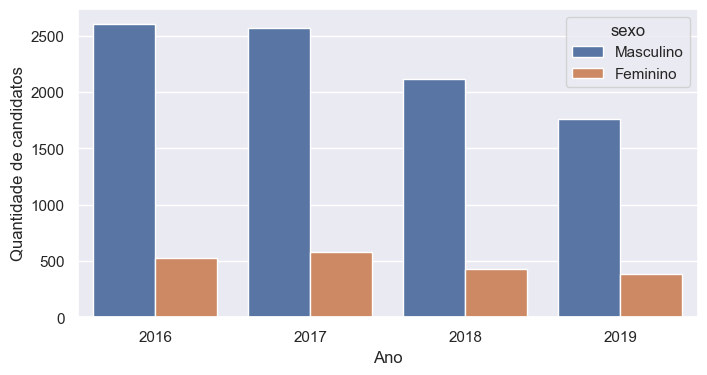

In [233]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 4))

# grouped barplot
sns.barplot(x="ano", y="quantidade", hue="sexo", data=sexo_df);
plt.xlabel('Ano');
plt.ylabel('Quantidade de candidatos');

In [27]:
dados['SEXO'].value_counts()

1    9063
0    1914
Name: SEXO, dtype: int64

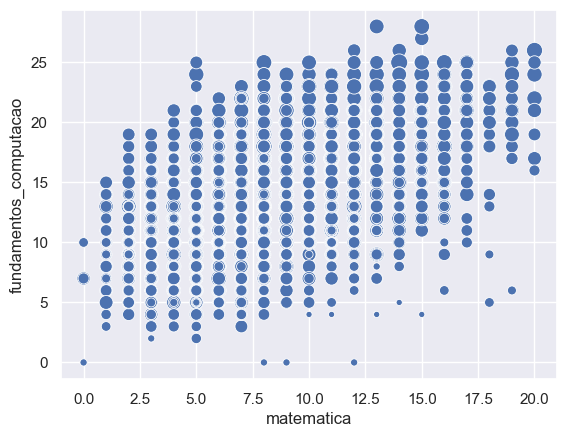

In [28]:

# use the scatterplot function to build the bubble map
sns.scatterplot(data=dados, x="matematica", y="fundamentos_computacao", size="tecnologia_computacao", legend=False, sizes=(20, 150))

# show the graph
plt.show()

In [29]:
dados.head()

,SEXO,ESTADO,REGIAO,ESPECIALIDADE,PRESENTE,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,ANO,matematica,fundamentos_computacao,tecnologia_computacao
0,1,5,1,teoria da computação,S,0,3.0,3.0,2.0,0.0,...,1.0,3.0,2.0,1.0,1.0,1.0,2016,14.0,21.0,10.0
1,1,20,4,metodologia e técnicas da computação,S,0,3.0,2.0,3.0,2.0,...,2.0,1.0,3.0,1.0,2.0,1.0,2016,16.0,22.0,12.0
2,1,24,3,engenharia de software,S,0,0.0,1.0,1.0,1.0,...,2.0,0.0,2.0,0.0,2.0,1.0,2016,4.0,16.0,8.0
3,1,13,0,modelagem e gerência de sistemas de informação,S,0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2016,4.0,13.0,7.0
4,0,3,0,"computação gráfica, imagens e visualização",S,0,0.0,0.0,2.0,2.0,...,2.0,3.0,3.0,0.0,1.0,1.0,2016,6.0,15.0,11.0


In [30]:
dados_eixo_area = dados.iloc[:,32:35]
dados_eixo_area.head()

,matematica,fundamentos_computacao,tecnologia_computacao
0,14.0,21.0,10.0
1,16.0,22.0,12.0
2,4.0,16.0,8.0
3,4.0,13.0,7.0
4,6.0,15.0,11.0


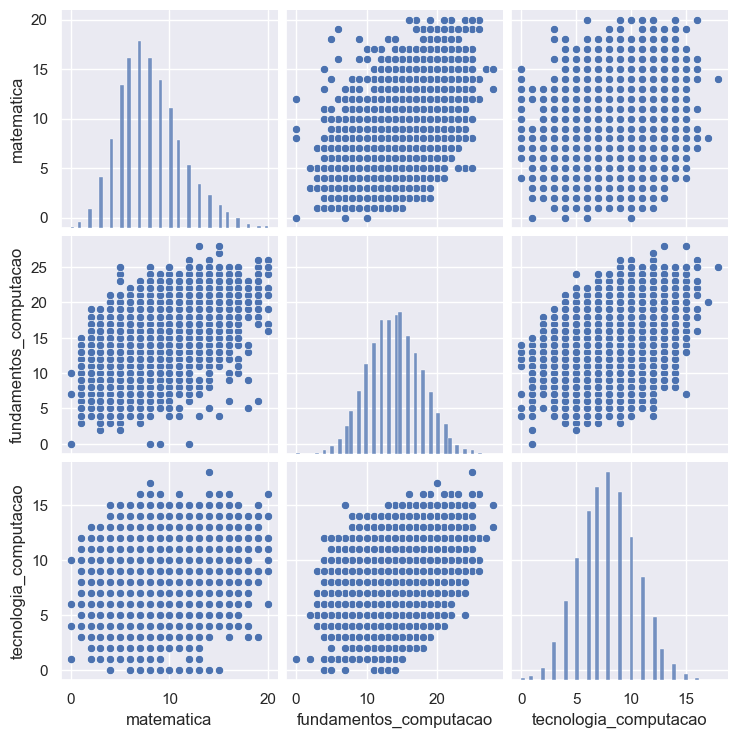

In [31]:
sns.pairplot(dados_eixo_area)
plt.show()

In [32]:
dados.head()

,SEXO,ESTADO,REGIAO,ESPECIALIDADE,PRESENTE,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,ANO,matematica,fundamentos_computacao,tecnologia_computacao
0,1,5,1,teoria da computação,S,0,3.0,3.0,2.0,0.0,...,1.0,3.0,2.0,1.0,1.0,1.0,2016,14.0,21.0,10.0
1,1,20,4,metodologia e técnicas da computação,S,0,3.0,2.0,3.0,2.0,...,2.0,1.0,3.0,1.0,2.0,1.0,2016,16.0,22.0,12.0
2,1,24,3,engenharia de software,S,0,0.0,1.0,1.0,1.0,...,2.0,0.0,2.0,0.0,2.0,1.0,2016,4.0,16.0,8.0
3,1,13,0,modelagem e gerência de sistemas de informação,S,0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2016,4.0,13.0,7.0
4,0,3,0,"computação gráfica, imagens e visualização",S,0,0.0,0.0,2.0,2.0,...,2.0,3.0,3.0,0.0,1.0,1.0,2016,6.0,15.0,11.0


In [33]:
dados_materias = dados.iloc[:,6:31]
dados_materias.describe()

,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,Probabilidade e Estatística,Lógica Matemática,Organização de Arquivos e Dados,Técnicas de Programação,Circuitos Digitais,...,Sistemas Operacionais,Arquitetura e Organização de Computadores,Redes de Computadores,Computação Gráfica,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados
count,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,...,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000
mean,1.228387,1.104127,1.298807,1.025781,1.203152,0.830281,1.329416,0.762321,2.196411,1.256536,...,1.003188,0.925116,1.197048,0.505876,1.125171,1.073791,1.771796,0.570648,0.724697,0.913364
std,0.826980,0.827616,0.967677,0.897930,0.891273,0.692842,0.881501,0.760549,0.717629,0.855738,...,0.799331,0.784115,0.825455,0.606382,0.751457,0.894806,0.898115,0.635406,0.668973,0.777005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000


In [34]:
ano = [2016,2017,2018,2019]

In [35]:
def percentageDict(means):
    percentage_subjects = {}
    for subject in means:
        percentage_subjects_edition = []
        for i in range(len(ano)):
            edition_subject_mean = means[subject].iloc[i]
            if subject in dados_materias.columns:
                percentage_subjects_edition += [edition_subject_mean / 2 * 100] # 2 -> número de questões que caíram
            else:
                percentage_subjects_edition += [edition_subject_mean / 3 * 100]
        percentage_subjects[subject] = percentage_subjects_edition
    return percentage_subjects

In [36]:
porcentagem_brasil = percentageDict(dados_materias)
porcentagem_brasil

{'Matemática Discreta': [150.0, 150.0, 0.0, 50.0],
 'Cálculo Diferencial e Integral': [150.0, 100.0, 50.0, 0.0],
 'Álgebra Linear': [100.0, 150.0, 50.0, 50.0],
 'Geometria Analítica': [0.0, 100.0, 50.0, 50.0],
 'Análise Combinatória': [50.0, 100.0, 0.0, 0.0],
 'Probabilidade e Estatística': [100.0, 100.0, 0.0, 0.0],
 'Lógica Matemática': [150.0, 100.0, 50.0, 50.0],
 'Organização de Arquivos e Dados': [100.0, 50.0, 50.0, 0.0],
 'Técnicas de Programação': [150.0, 150.0, 150.0, 150.0],
 'Circuitos Digitais': [150.0, 100.0, 50.0, 100.0],
 'Análise de Algoritmos': [50.0, 100.0, 100.0, 50.0],
 'Teoria dos Grafos': [150.0, 150.0, 100.0, 100.0],
 'Linguagens Formais, Autômatos e Computabilidade': [100.0, 100.0, 50.0, 50.0],
 'Algoritmos e Estruturas de Dados': [50.0, 150.0, 50.0, 100.0],
 'Linguagens de Programação': [150.0, 150.0, 100.0, 100.0],
 'Sistemas Operacionais': [100.0, 100.0, 100.0, 0.0],
 'Arquitetura e Organização de Computadores': [50.0, 50.0, 50.0, 0.0],
 'Redes de Computadores'

In [37]:
# range_questions = np.arange(4)
# sns.set_palette('Set2')
# sns.set_style('white')
# fig = plt.figure(figsize=(20, 18))
# spec = fig.add_gridspec(ncols=5, nrows=5)
# i = 0
# j = 0
# for subject in porcentagem_brasil:
#     if j == 5:
#         i += 1
#         j = 0
#     ax = fig.add_subplot(spec[i,j])
#     ax.plot(dados_materias[subject], label = 'Brasil', lw = 2)
#     ax.set_yticks([0,25,50,75,100])
#     ax.set_xticks(range_questions)
#     ax.set_ylabel('Acertos')
#     ax.set_xlabel('Edição')
#     ax.set_title(subject)
#     ax.set_xticklabels(ano)
#     ax.set_yticklabels(['0%','25%','50%','75%','100%'])
#     ax.legend()
#     j += 1

# fig.suptitle('Porcentagem de acerto por matéria')
# fig.tight_layout()
# plt.show()

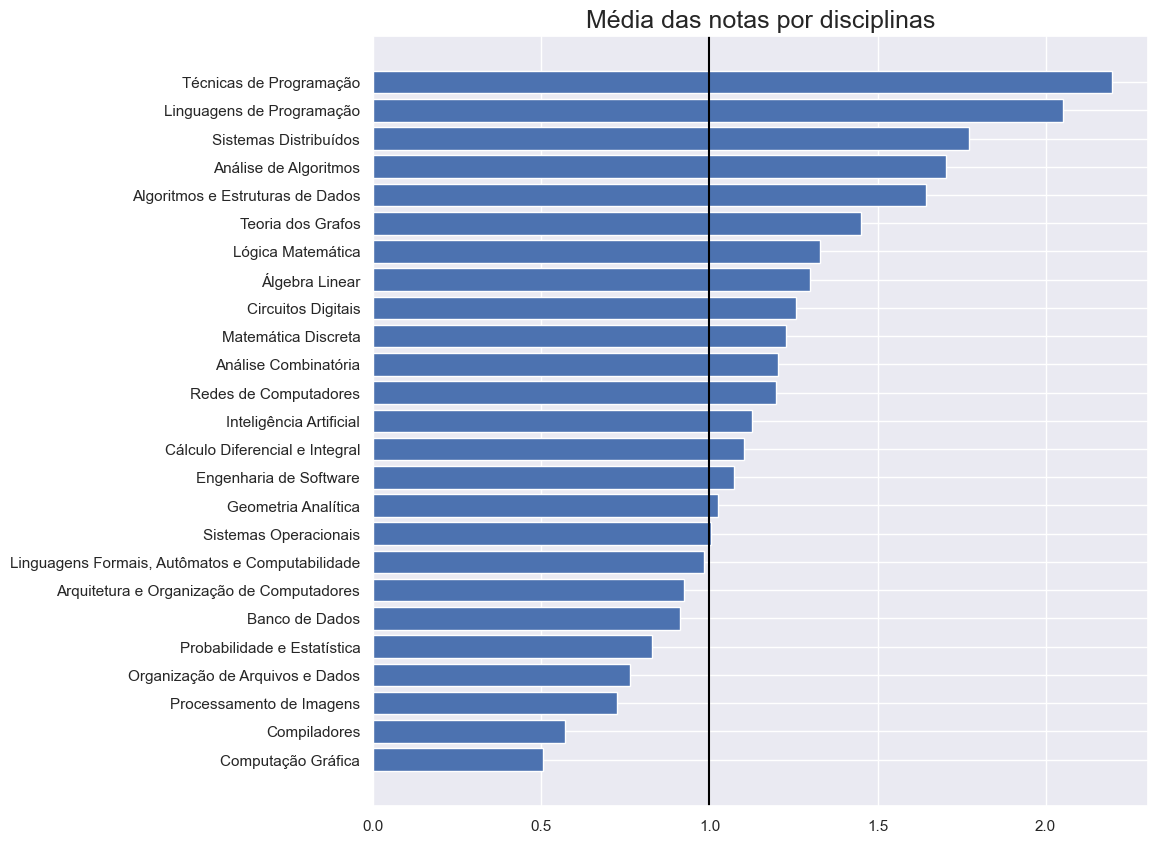

In [38]:
media = dados_materias.mean().sort_values()
materais_name = media.keys()

fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(materais_name, media)
labels = ax.get_xticklabels()
# plt.setp(labels, rotation=45, horizontalalignment='right')

ax.axvline(1.0, ls='-', color='black')
plt.title('Média das notas por disciplinas', fontsize=18)

plt.show()

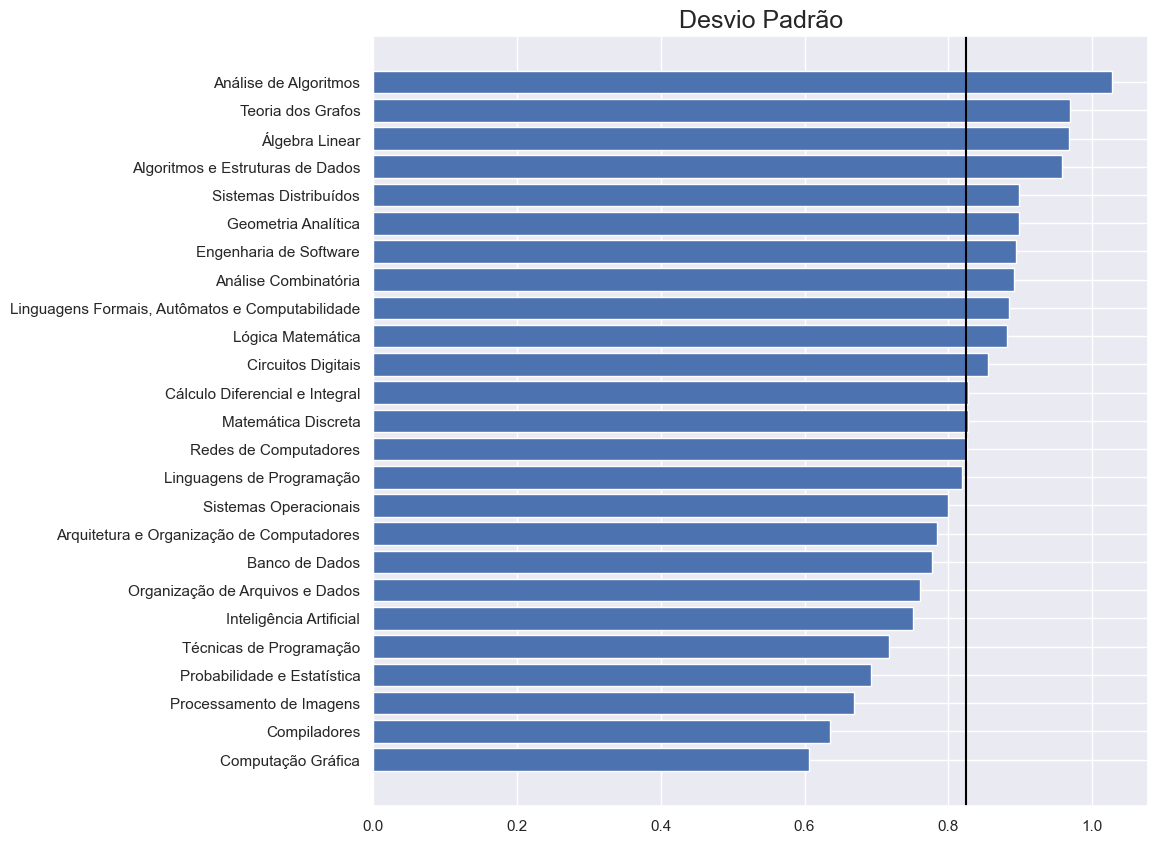

In [39]:
desvio_padrao = dados_materias.std().sort_values()
materais_name_std = desvio_padrao.keys()

fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(materais_name_std, desvio_padrao)
labels = ax.get_xticklabels()
# plt.setp(labels, horizontalalignment='right')

ax.axvline(desvio_padrao.mean(), ls='-', color='black')
plt.title('Desvio Padrão', fontsize=18)
plt.show()

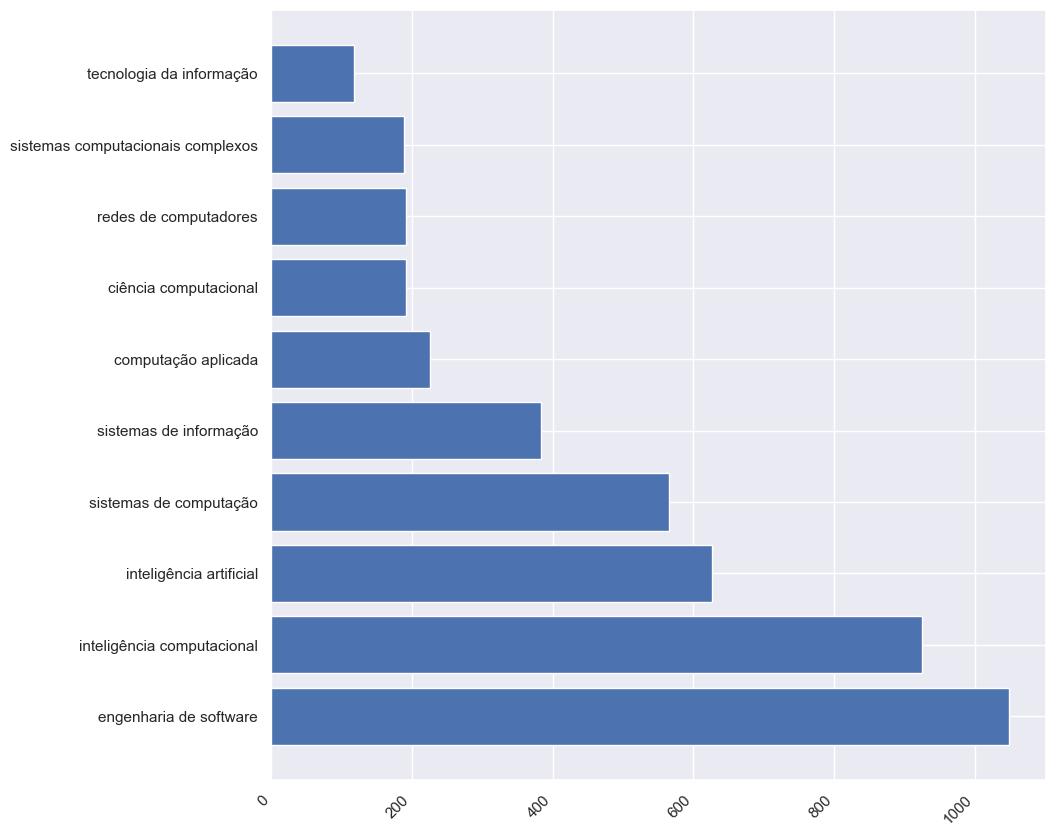

In [40]:
areas_mais_requisitadas = dados['ESPECIALIDADE'].value_counts()[:10]
areas_labels = areas_mais_requisitadas.keys()

fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(areas_labels, areas_mais_requisitadas)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# ax.axvline(desvio_padrao.mean(), ls='-', color='black')

plt.show()

##### Nuvem de palavras

In [41]:
# list(dados['ESPECIALIDADE'].unique())
dados_especialidades = dados.loc[:,['ESPECIALIDADE']]
# dados_especialidades[dados_especialidades['ESPECIALIDADE'] == 'engenharia de software']
# dados_especialidades['ESPECIALIDADE'][85].split(' e ')
dados_especialidades

,ESPECIALIDADE
0,teoria da computação
1,metodologia e técnicas da computação
2,engenharia de software
3,modelagem e gerência de sistemas de informação
4,"computação gráfica, imagens e visualização"
...,...
10972,inteligência artificial
10973,redes de computadores e sistemas distribuidos
10974,"engenharia de software, gerenciamento de infor..."
10975,inteligência computacional


In [42]:
# # Libraries
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# import matplotlib.pyplot as plt

# # Create a list of word
# text = dados_especialidades['ESPECIALIDADE'].tolist()


# # Create the wordcloud object
# wordcloud2 = WordCloud(width=6000, height=4000, 
#                        background_color="white", 
#                        random_state=1, 
#                        min_word_length=2).generate(','.join(text))
# # WordCloud.generate_from_frequencies

# # Display the generated image:
# plt.imshow(wordcloud2, interpolation="bilinear")
# plt.axis("off")
# # plt.margins(x=10, y=1)
# plt.savefig('imagens/nuvem_palavras.png', format='png', dpi = 300, bbox_inches='tight')
# plt.show()

## K-means

In [43]:
from sklearn.cluster import KMeans

In [44]:
dataset = dados.copy()
dataset_kmeans = dataset.drop(columns=['PRESENTE', 'CARGO', 'ANO'])
# dataset_kmeans['soma'] = dataset_kmeans['matematica'] + dataset_kmeans['fundamentos_computacao'] + dataset_kmeans['tecnologia_computacao']
dataset_kmeans.head()

,SEXO,ESTADO,REGIAO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,Probabilidade e Estatística,...,Computação Gráfica,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,matematica,fundamentos_computacao,tecnologia_computacao
0,1,5,1,teoria da computação,3.0,3.0,2.0,0.0,1.0,2.0,...,0.0,1.0,3.0,2.0,1.0,1.0,1.0,14.0,21.0,10.0
1,1,20,4,metodologia e técnicas da computação,3.0,2.0,3.0,2.0,2.0,2.0,...,0.0,2.0,1.0,3.0,1.0,2.0,1.0,16.0,22.0,12.0
2,1,24,3,engenharia de software,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,2.0,1.0,4.0,16.0,8.0
3,1,13,0,modelagem e gerência de sistemas de informação,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,13.0,7.0
4,0,3,0,"computação gráfica, imagens e visualização",0.0,0.0,2.0,2.0,1.0,0.0,...,0.0,2.0,3.0,3.0,0.0,1.0,1.0,6.0,15.0,11.0


In [45]:
dataset_kmeans = dataset_kmeans.dropna()
X_dataset_kmeans = dataset_kmeans.loc[:,['matematica', 'fundamentos_computacao','tecnologia_computacao']]
# X_dataset_kmeans = dataset_kmeans.loc[:,['matematica', 'fundamentos_computacao']]

### Padronizando os dados

In [46]:
from sklearn import preprocessing

# scaler_poscomp = StandardScaler()
# X_dataset_kmeans = scaler_poscomp.fit_transform(X_dataset_kmeans)
# X_dataset_kmeans

min_max_scaler = preprocessing.MinMaxScaler()
X_dataset_kmeans = min_max_scaler.fit_transform(X_dataset_kmeans)

### Encontrar o número ideal de cluster

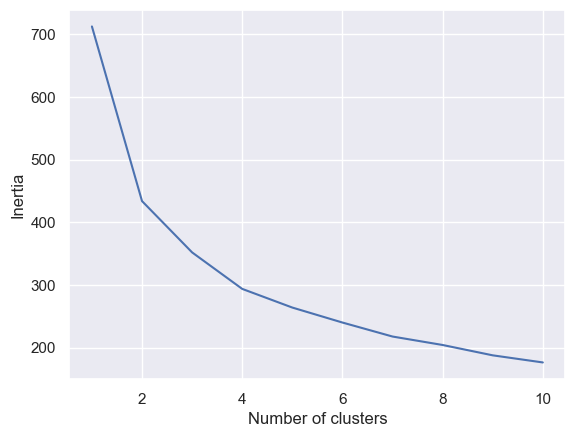

In [47]:
# Crie uma lista vazia para armazenar as inércia dos clusters para diferentes valores de k
inertias = []

# Teste diferentes valores de k
for k in range(1, 11):
    # Treine o modelo KMeans com o número atual de clusters
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X_dataset_kmeans)


    # Adicione a inércia do cluster atual à lista
    inertias.append(kmeans.inertia_)

# Plote a inércia x k
plt.plot(range(1, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

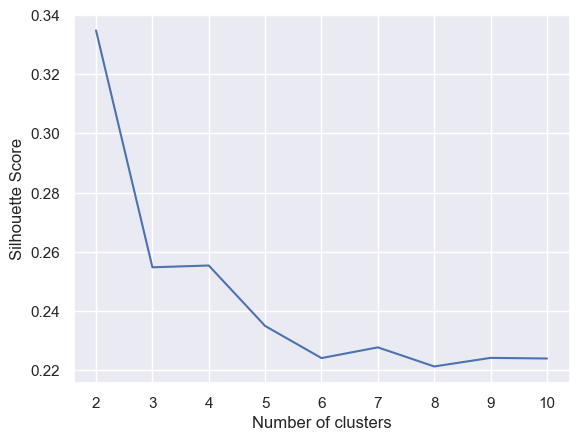

In [48]:
from sklearn.metrics import silhouette_score

# Crie uma lista vazia para armazenar os scores de silhueta para diferentes valores de k
scores = []

# Teste diferentes valores de k
for k in range(2, 11):
    # Treine o modelo KMeans com o número atual de clusters
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X_dataset_kmeans)

    # Calcule o score de silhueta para os clusters atuais
    score = silhouette_score(X_dataset_kmeans, kmeans.labels_)
    scores.append(score)

# Plote o score de silhueta x k
plt.plot(range(2, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

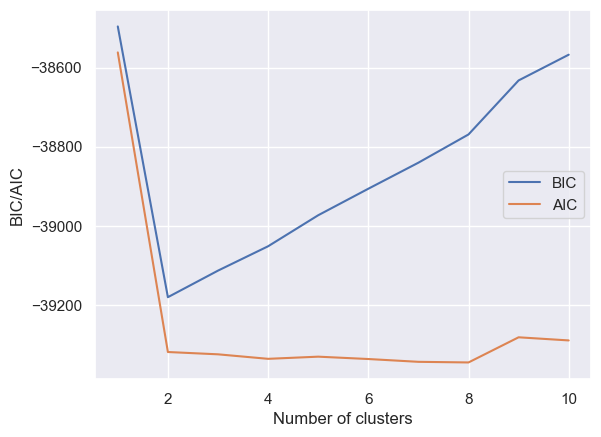

In [49]:
# Plotar BIC/AIC para encontrar o número de cluster
from sklearn.mixture import GaussianMixture

# Crie uma lista vazia para armazenar os valores BIC e AIC
bic_values = []
aic_values = []

# Teste diferentes valores de k
for k in range(1, 11):
    # Crie um modelo GaussianMixture com o número atual de clusters
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X_dataset_kmeans)
    
    # Armazena os valores BIC e AIC
    bic_values.append(gmm.bic(X_dataset_kmeans))
    aic_values.append(gmm.aic(X_dataset_kmeans))

# Plot BIC x k
plt.plot(range(1, 11), bic_values, label="BIC")
# Plot AIC x k
plt.plot(range(1, 11), aic_values, label="AIC")
plt.xlabel('Number of clusters')
plt.ylabel('BIC/AIC')
plt.legend()
plt.show()

In [50]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(X_dataset_kmeans)
    wcss.append(kmeans.inertia_)

In [51]:
print(wcss)

[712.3721879632521, 433.72236305204643, 351.92817849778936, 293.2309606800668, 259.5313396067189, 243.70166811261882, 215.6871070288324, 201.9353342840972, 187.07276340041787, 175.82657785637403]


Text(0, 0.5, 'WCSS')

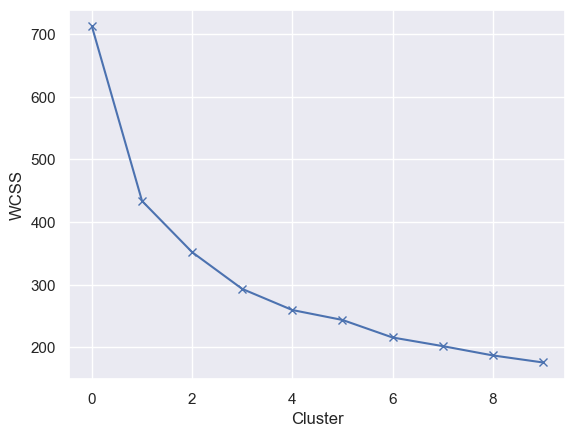

In [52]:
plt.plot(wcss, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('WCSS')

#### Outro BIC/AIC

#### Outro BIC/AIC

In [53]:
# kmeans_poscomp = KMeans(n_clusters=3, n_init='auto')
# rotulos_kmeans = kmeans_poscomp.fit_predict(X_dataset_kmeans)
# X_dataset_kmeans
model = KMeans(n_clusters=2, n_init=4, random_state=0, init='k-means++', max_iter=300)
model.fit(X_dataset_kmeans)
dataset_kmeans['Grupo'] = model.predict(X_dataset_kmeans)
dataset_kmeans.head()

,SEXO,ESTADO,REGIAO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,Probabilidade e Estatística,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,matematica,fundamentos_computacao,tecnologia_computacao,Grupo
0,1,5,1,teoria da computação,3.0,3.0,2.0,0.0,1.0,2.0,...,1.0,3.0,2.0,1.0,1.0,1.0,14.0,21.0,10.0,0
1,1,20,4,metodologia e técnicas da computação,3.0,2.0,3.0,2.0,2.0,2.0,...,2.0,1.0,3.0,1.0,2.0,1.0,16.0,22.0,12.0,0
2,1,24,3,engenharia de software,0.0,1.0,1.0,1.0,0.0,0.0,...,2.0,0.0,2.0,0.0,2.0,1.0,4.0,16.0,8.0,1
3,1,13,0,modelagem e gerência de sistemas de informação,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,4.0,13.0,7.0,1
4,0,3,0,"computação gráfica, imagens e visualização",0.0,0.0,2.0,2.0,1.0,0.0,...,2.0,3.0,3.0,0.0,1.0,1.0,6.0,15.0,11.0,0


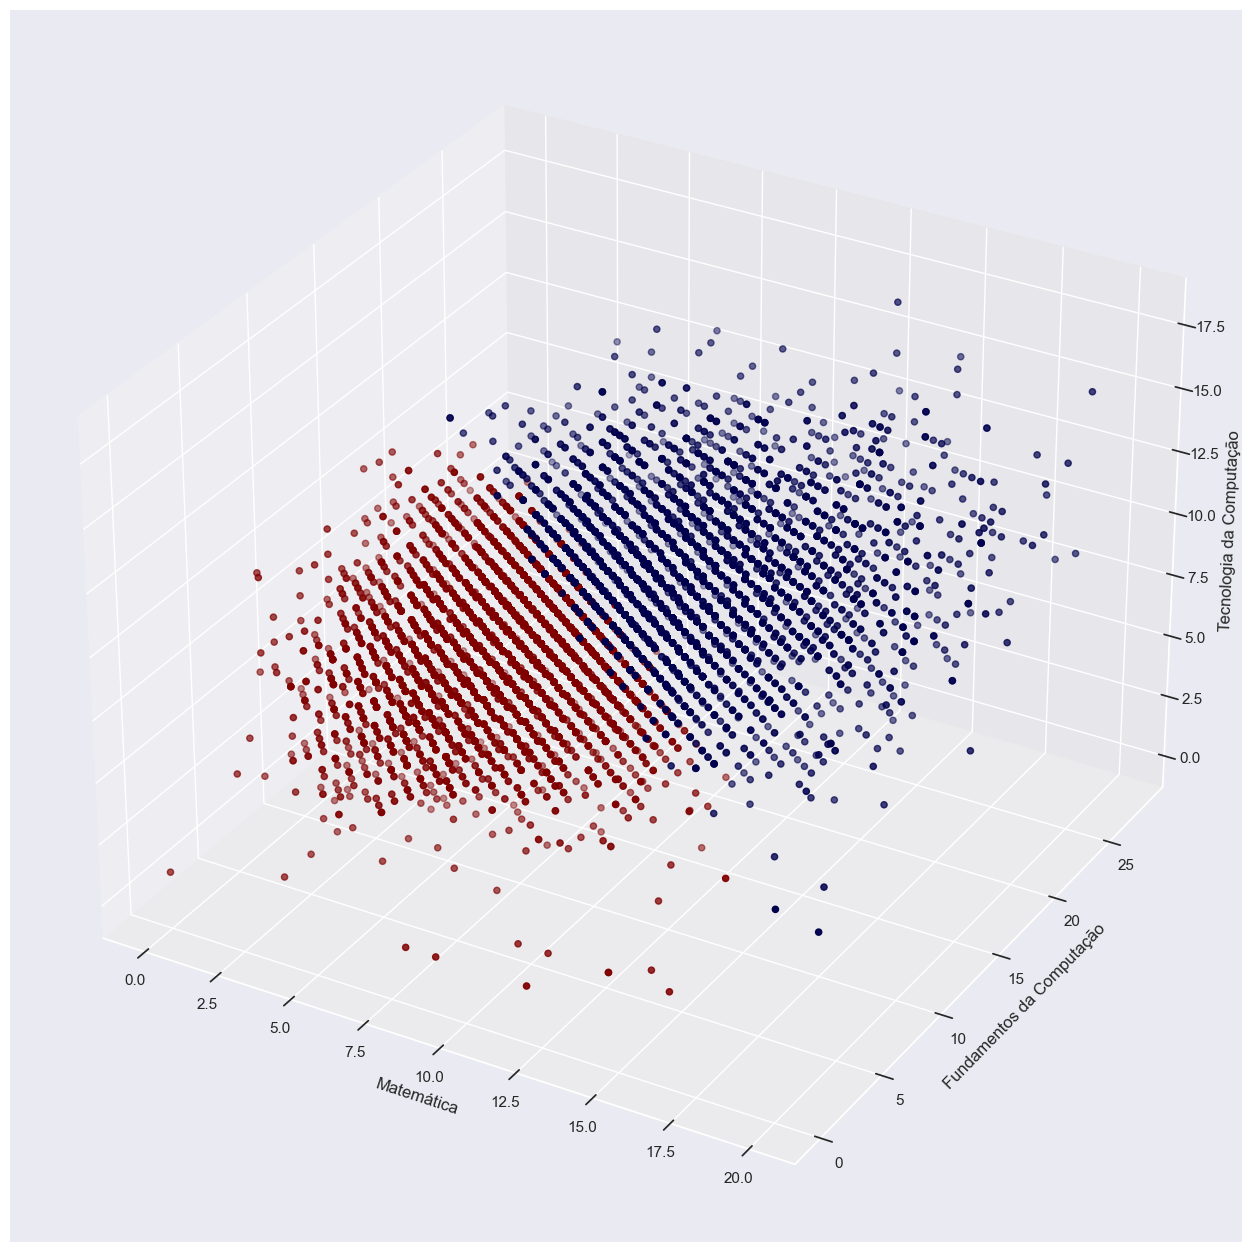

In [251]:
# sns.scatterplot(data=dataset_kmeans, x="matematica", y="fundamentos_computacao", hue='Grupo', style='Grupo', palette='tab10')
# plt.show()

sns.set(style="darkgrid")
fig = plt.figure(figsize = (16, 16))
ax = plt.axes(projection = '3d')
sctt= ax.scatter3D(dataset_kmeans['matematica'], dataset_kmeans['fundamentos_computacao'], dataset_kmeans['tecnologia_computacao'], c = dataset_kmeans['Grupo'], cmap='seismic')
ax.set_xlabel('Matemática')
ax.set_ylabel('Fundamentos da Computação')
ax.set_zlabel('Tecnologia da Computação')
plt.savefig('imagens/grafico_kmeans.png', dpi = 300, bbox_inches='tight')

### Definindo grupos

In [ ]:
# lista_clientes = np.column_stack((dataset_kmeans))
# lista_clientes = lista_clientes[lista_clientes[:,3].argsort()]
# lista_clientes

Grupo  matematica  fundamentos_computacao
1      7.0         12.0                      176
       6.0         13.0                      169
                   12.0                      167
                   14.0                      154
       7.0         13.0                      152
                                            ... 
0      19.0        26.0                        1
                   25.0                        1
                   24.0                        1
                   23.0                        1
1      16.0        6.0                         1
Length: 437, dtype: int64

In [100]:
frame = pd.DataFrame(dataset_kmeans.groupby(['Grupo']).value_counts())

In [103]:
analise = dataset_kmeans.groupby(['Grupo']).agg({'matematica': ['mean', 'median', 'max', 'std'],
                                                            'fundamentos_computacao': ['mean', 'median', 'max', 'std'],
                                                            'tecnologia_computacao': ['mean', 'median', 'max', 'std']})
# analise.rename(index= estados)

In [104]:
analise

matematica                        fundamentos_computacao               \
            mean median   max       std                   mean median   max   
Grupo                                                                         
0      10.508713   10.0  20.0  2.691096              16.794037   17.0  28.0   
1       6.112327    6.0  16.0  2.021118              11.817509   12.0  21.0   

                tecnologia_computacao                         
            std                  mean median   max       std  
Grupo                                                         
0      2.917058              9.442368    9.0  18.0  2.259839  
1      2.869304              6.686675    7.0  15.0  2.191131

In [102]:
frame.to_csv('frame.csv')

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from itertools import product

In [ ]:
dataset = dados.copy()
dataset_dbscan = dataset.drop(columns=['ESPECIALIDADE','PRESENTE', 'CARGO', 'ANO', 'REGIAO'])
# dataset_kmeans['soma'] = dataset_kmeans['matematica'] + dataset_kmeans['fundamentos_computacao'] + dataset_kmeans['tecnologia_computacao']
dataset_dbscan.head()

In [ ]:
dataset_dbscan = dataset_dbscan.dropna()
X_dataset_dbscan = dataset_dbscan.loc[:,['matematica', 'fundamentos_computacao','tecnologia_computacao']]

In [ ]:
X_poscompDB = np.array(X_dataset_dbscan)

Determinar os valores de eps e min_simples

In [ ]:
db = DBSCAN(eps=1.5, min_samples=8, metric='euclidean').fit(X_poscompDB)
rotulos_DBSCAN = db.labels_
rotulos_DBSCAN
np.unique(rotulos_DBSCAN, return_counts=True)

In [ ]:
import itertools
pca_eps_values = np.arange(0.1,1.6,0.1)
pca_min_samples = np.arange(2,9)
pca_dbscan_params = list(itertools.product(pca_eps_values, pca_min_samples))
pca_dbscan_params
pca_no_of_clusters = []
pca_sil_score = []
pca_epsvalues = []
pca_min_samp = []
for p in pca_dbscan_params:pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_poscompDB)
pca_epsvalues.append(p[0])
pca_min_samp.append(p[1])
pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))
pca_sil_score.append(silhouette_score(X_poscompDB, pca_dbscan_cluster.labels_))
pca_eps_min = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))
pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=[['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points']])
pca_eps_min_df

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
  % metrics.silhouette_score(X_poscompDB, rotulos_DBSCAN))

In [ ]:
n_clusters_ = len(set(rotulos_DBSCAN)) - (1 if -1 in rotulos_DBSCAN else 0)
n_noise_ = list(rotulos_DBSCAN).count(-1)
n_clusters_

In [ ]:
# grafico = px.scatter(x= X_notas_pca[:,0], y = X_notas_pca[:,1], color=rotulos)
# grafico.show()
fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection = '3d')
ax.scatter3D(X_poscompDB[:,0], X_poscompDB[:,1], X_poscompDB[:,2], c = rotulos_DBSCAN)
plt.savefig('imagens/grafico_dbscan.png', dpi = 300, bbox_inches='tight')

In [ ]:
# grafico = px.scatter(x= X_pca_dataset_dbscan[:,0], y= X_pca_dataset_dbscan[:,1], color=rotulos_DBSCAN)
# grafico.show()

In [ ]:
lista_dbscan = np.column_stack((dataset_dbscan, rotulos_DBSCAN))
lista_dbscan = lista_dbscan[lista_dbscan[:,3].argsort()]
lista_dbscan

In [ ]:
dataset_dbscan['grupos'] = rotulos_DBSCAN
dataset_dbscan['ESTADO'] = dataset_dbscan['ESTADO'].replace(estados)

In [ ]:
frame_dbscan = pd.DataFrame(dataset_dbscan.groupby(['grupos','ESTADO'])['matematica', 'fundamentos_computacao','tecnologia_computacao'].sum())

In [ ]:
frame_dbscan

## Agrupamento hierárquico

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
dataset = dados.copy()
dataset_hierarquico = dataset.iloc[:,[1,32,33,34]]
dataset_hierarquico = dataset_hierarquico.dropna()
X_dataset_hierarquico = dataset_hierarquico.values

In [ ]:
dendrograma = dendrogram(linkage(dataset_hierarquico, method='ward'))
plt.title('Dendrograma')
plt.xlabel('ESTADO')
plt.ylabel('Distância');

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
ah_poscomp = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
rotulos_ah = ah_poscomp.fit_predict(X_dataset_hierarquico)

In [ ]:
rotulos_ah

In [ ]:
# grafico = px.scatter(x= X_notas_pca[:,0], y = X_notas_pca[:,1], color=rotulos)
# grafico.show()
fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection = '3d')
ax.scatter3D(X_dataset_hierarquico[:,0], X_dataset_hierarquico[:,1], X_dataset_hierarquico[:,2], c = rotulos_ah)
plt.savefig('imagens/grafico_hierarquico.jpg', dpi = 300, bbox_inches='tight')

In [ ]:
lista_hierarquico = np.column_stack((dataset_hierarquico, rotulos_ah))
lista_hierarquico = lista_hierarquico[lista_hierarquico[:,3].argsort()]
lista_hierarquico

In [ ]:
dataset_hierarquico['grupos'] = rotulos_ah
dataset_hierarquico['ESTADO'] = dataset_hierarquico['ESTADO'].replace(estados)

In [ ]:
frame_hierarquico = pd.DataFrame(dataset_hierarquico.groupby(['grupos','ESTADO'])['matematica', 'fundamentos_computacao','tecnologia_computacao'].mean())

In [ ]:
frame_hierarquico

Avaliação dos algoritmos

In [ ]:
dataset_hierarquico.head()

In [ ]:
from sklearn.model_selection import train_test_split   # Função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X_dataset_hierarquico, dataset_hierarquico, test_size=0.30) # Divide 20% para teste

In [ ]:
# Constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, rotulos_ah))
print(classification_report(y_test, rotulos_ah))

In [ ]:
# dataset_dbscan
# dataset_hierarquico
# dataset_kmeans